In [1]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as pots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Categorical Distribution ##

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [3]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [5]:
#Table.group?
studio_distribution = studios.group('Studio')

In [6]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [17]:
# Exercise: Pick a studio that only released one of the top movies
# and then find the movie they released.
one_movie = studio_distribution.where('count', are.equal_to(1))
one_movie.show()

name = 'Buena Vista'
top_movies.where('Studio', name).sort('Year').show()


Studio,count
AVCO,1
IFC,1
Metro,1
NM,1
Orion,1
Selz.,1
Sum.,1


Title,Studio,Gross,Gross (Adjusted),Year
Three Men and a Baby,Buena Vista,167780960,370746600,1987
Who Framed Roger Rabbit,Buena Vista,156452370,338409100,1988
Pretty Woman,Buena Vista,178406268,374948400,1990
Beauty and the Beast,Buena Vista,218967620,403283400,1991
Aladdin,Buena Vista,217350219,466212500,1992
The Lion King,Buena Vista,422783777,792511700,1994
Toy Story,Buena Vista,191796233,389989400,1995
Armageddon,Buena Vista,201578182,382096000,1998
The Sixth Sense,Buena Vista,293506292,511878400,1999
Toy Story 2,Buena Vista,245852179,425266700,1999


## Bar Charts ##

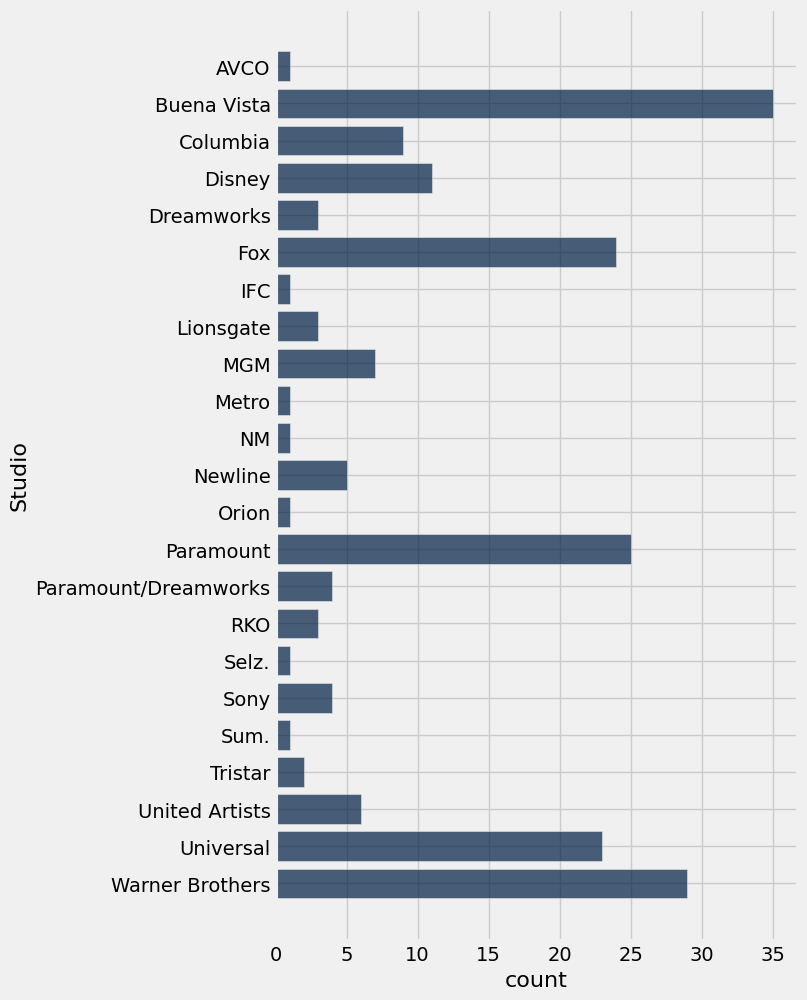

In [13]:
studio_distribution.barh('Studio')

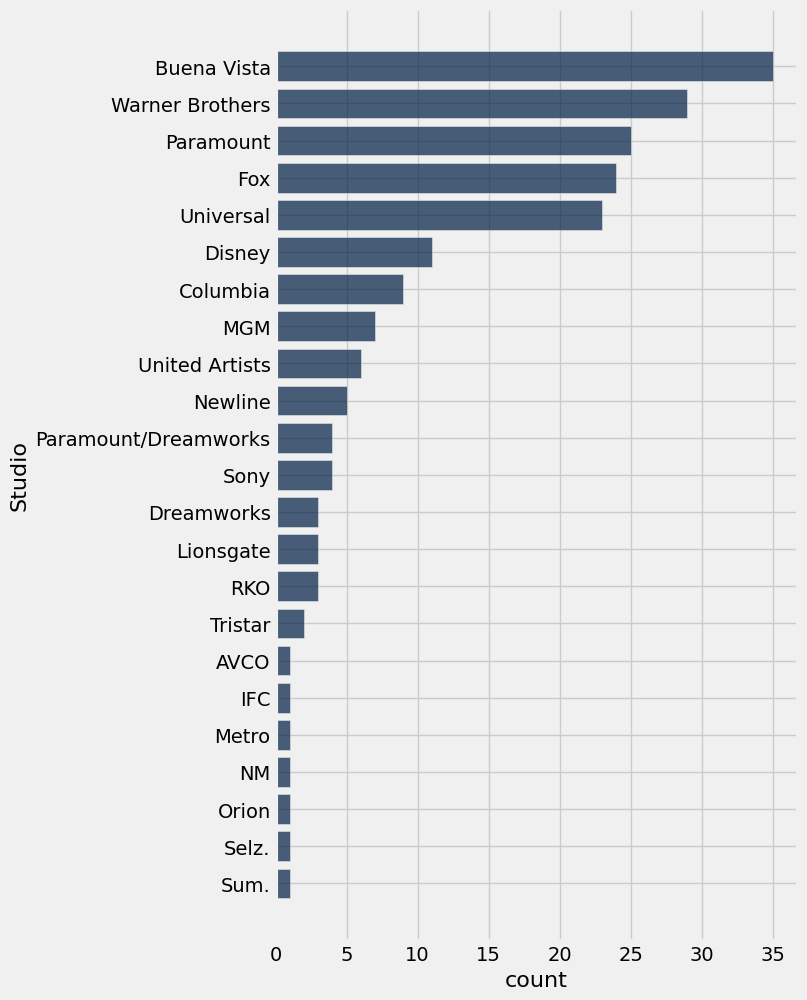

In [14]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [20]:
ages = 2025 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [21]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,86
Star Wars,Fox,460998007,1583483200,1977,48
The Sound of Music,Fox,158671368,1266072700,1965,60
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,43
Titanic,Paramount,658672302,1204368000,1997,28
The Ten Commandments,Paramount,65500000,1164590000,1956,69
Jaws,Universal,260000000,1138620700,1975,50
Doctor Zhivago,MGM,111721910,1103564200,1965,60
The Exorcist,Warner Brothers,232906145,983226600,1973,52
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,88


In [33]:
print(min(ages), max(ages))

# Exercise: Find the 5 oldest movies and the 5 newest movies. Remember 
# that we can TAKE from a table.
old_movies = top_movies.sort('Age', descending=True).take(np.arange(0, 5))
old_movies.show()
new_movies = top_movies.sort('Age', descending=False).take(np.arange(0, 5))
new_movies.show()

# Extension: Add a column which includes the RATIO of the adjusted 
# revenue to the gross revenue. What do you observe?
# Tip: write ratio_movies = top_movies.with_columns(......)
ratio_movies = ...

8 104


Title,Studio,Gross,Gross (Adjusted),Year,Age
The Four Horsemen of the Apocalypse,Metro,9183673,408214300,1921,104
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,88
Gone with the Wind,MGM,198676459,1796176700,1939,86
Pinocchio,Disney,84254167,599215600,1940,85
Fantasia,Disney,76408097,738256500,1941,84


Title,Studio,Gross,Gross (Adjusted),Year,Age
Beauty and the Beast (2017),Buena Vista,504014165,504014165,2017,8
Wonder Woman,Warner Brothers,406381596,406381596,2017,8
Guardians of the Galaxy Vol. 2,Buena Vista,389397196,389397196,2017,8
Rogue One: A Star Wars Story,Buena Vista,532177324,537326000,2016,9
Finding Dory,Buena Vista,486295561,499245400,2016,9


In [34]:
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,72
25,69
50,48
75,10
100,0


## Histograms ##

In [35]:
# Now we're going to start making some histograms:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [36]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,12
10,18
15,42
25,44
40,59
65,24
100,0


In [42]:
top_movies.bin('Age', bins = np.arange(0, 101, 25))
Table.bin?

Signature: Table.bin(self, *columns, **vargs)
Docstring:
Group values by bin and compute counts per bin by column.

By default, bins are chosen to contain all values in all columns. The
following named arguments from numpy.histogram can be applied to
specialize bin widths:

If the original table has n columns, the resulting binned table has
n+1 columns, where column 0 contains the lower bound of each bin.

Args:
    ``columns`` (str or int): Labels or indices of columns to be
        binned. If empty, all columns are binned.

    ``bins`` (int or sequence of scalars): If bins is an int,
        it defines the number of equal-width bins in the given range
        (10, by default). If bins is a sequence, it defines the bin
        edges, including the rightmost edge, allowing for non-uniform
        bin widths.

    ``range`` ((float, float)): The lower and upper range of
        the bins. If not provided, range contains all values in the
        table. Values outside the range are ignor

In [38]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)
binned_data

bin,Age count,Percent
0,0,0
5,12,6
10,18,9
15,42,21
25,44,22
40,59,29.5
65,24,12
100,0,0


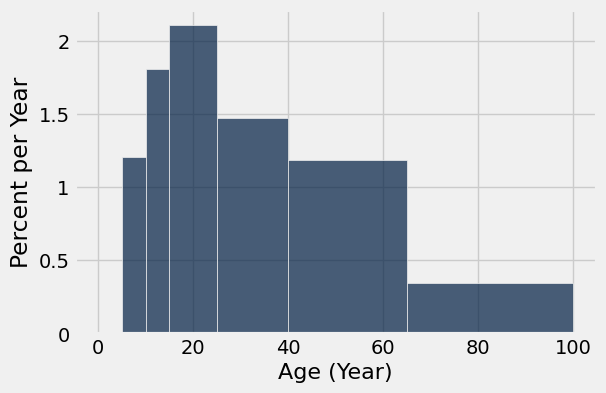

In [39]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

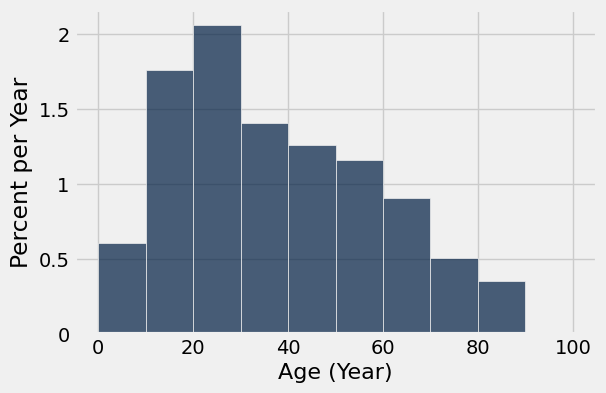

In [40]:
# Let's try equally spaced bins instead.
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

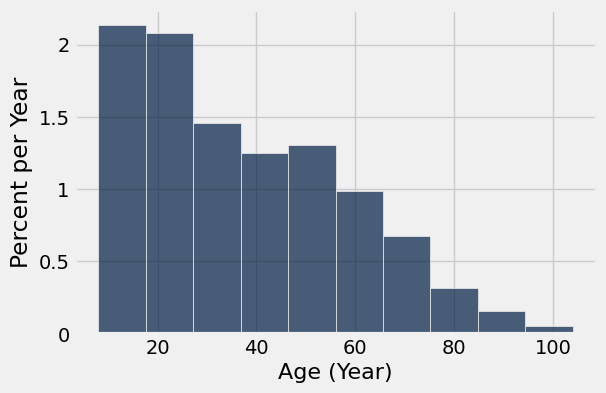

In [41]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

## Height ##

### Question: What is the height of the [40, 65] bin?

In [ ]:
top_movies.hist('Age', bins=my_bins, unit='Year')

In [ ]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)
percent

In [ ]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [ ]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

### What are the heights of the rest of the bins?

In [ ]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [ ]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [ ]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [ ]:
bin_lefts

In [ ]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

In [ ]:
# Exercise:
# Make a histogram of the top movies.
# Use bins with a width of 5 years and only take movies released from 1980 to 2014.
new_movies = ...
new_movie_bins = ...
new_movie_bins